<div style="border:solid green 2px; padding: 20px">
    
<b>Алексей, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Пример можно посмотреть в самом первом проекте (Музыка городов)
</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
print(data.head(20))

   total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0   20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1   7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2   10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...           

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
print(data.head(20))

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

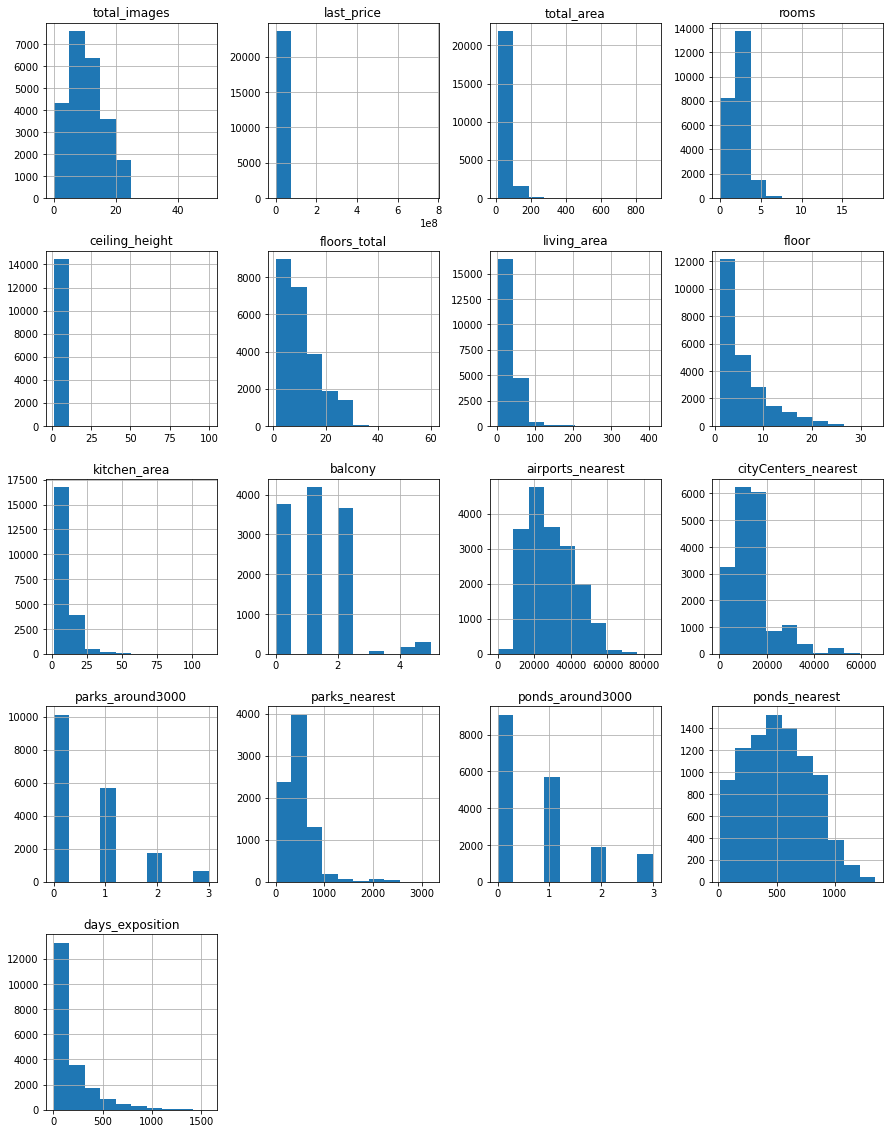

In [7]:
data.hist(figsize=(15, 20))

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Такие предупреждения можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку matplotlib
2. В конец кода добавить `;`
    
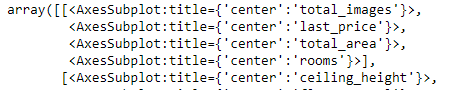
</div>

**Вывод:**

    
Есть пропущенные значения в:
    
* ceiling_height
* floors_total
* living_area (вставим медианные значения в соответствии с количеством комнат в квартире)
* is_apartment (выдвигается предположение, что пропущенные данные означает 0)
* kitchen_area 
* balcony (выдвигается предположение, что пропущенные данные означает 0)
* locality_name (Добавить значения не представляется возможным)
* airports_nearest (Добавить значения не представляется возможным)
* cityCenters_nearest (Добавить значения не представляется возможным)
* parks_around3000 (Добавить значения не представляется возможным)
* parks_nearest (Добавить значения не представляется возможным)
* ponds_around3000 (Добавить значения не представляется возможным)
* ponds_nearest (Добавить значения не представляется возможным)
* days_exposition 

Также необходимо поменять тип данных в:
* first_day_exposition - должен быть datetime, так как это дата
* floors_total - должен быть int, так как этажи это целое число
* is_apartment - должен быть bool, так как значение либо да либо нет
* parks_around3000 - должен быть int, так как количество парков это целое число
* ponds_around3000 - должен быть int, так как количество водоемов это целое число
* balcony - должен быть int, так как количество водоемов это целое число

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть, план намечен.

### Предобработка данных

In [8]:
data.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Проверка на дубликаты, основа предобработки данных
</div>

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

In [11]:
print(data.head(15))

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [13]:
data['balcony'] = data['balcony'].fillna(0)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Если пропусков меньше 5-10% их лучше сразу удалить, дабы сэкономить время

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Некоторые столбцы можно поменять на значения, относительно своего района (например высота пололков). Вот так
    
    
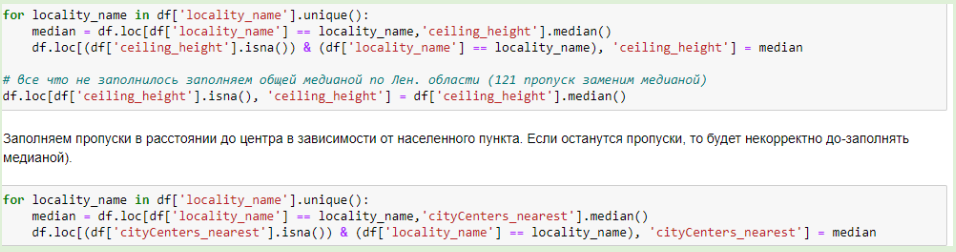
    
Если хочешь - дарю свой код =)
</div>

In [14]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.lower()


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код
</div>

In [18]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [19]:
data['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

In [20]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64

In [21]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [22]:
data['last_price'] = data['last_price'].astype('int')

In [23]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [24]:
last_price_kk = data['last_price'] / 1000

In [25]:
last_price_kk.describe()

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

In [26]:
sort_last_price = data.sort_values(by='last_price')
print(sort_last_price.head())

       total_images  last_price  total_area first_day_exposition  rooms  \
8793              7       12190       109.0           2019-03-20      2   
17456             7      430000        30.4           2019-04-22      1   
14911             5      430000        54.0           2018-06-26      2   
16274            18      440000        40.0           2018-07-10      1   
17676             0      450000        36.5           2018-02-01      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
8793             2.75          25.0         32.0     25         False  ...   
17456             NaN           2.0         16.0      1         False  ...   
14911             NaN           3.0         30.5      3         False  ...   
16274             NaN           5.0         17.6      1         False  ...   
17676             NaN           5.0         17.3      4         False  ...   

       kitchen_area  balcony          locality_name  airports_nearest  \
8793   

In [27]:
data = data[data.last_price > 20000]

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет: Рекомендую не смотреть данные "на глаз". Лучше посмотреть на выбросы и аномалии данных математически, и удалить их (если они соответствуют здравому смыслу). В этом поможет метод boxplot()
</div>

In [28]:
data['last_price'].describe()

count    2.369800e+04
mean     6.541824e+06
std      1.088716e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

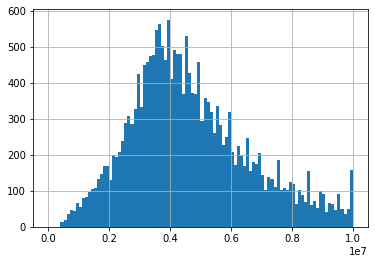

In [29]:
data['last_price'].hist(bins=100, range = (0, 10000000))

Распределение цен является нормальным

In [30]:
data['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

In [31]:
data['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

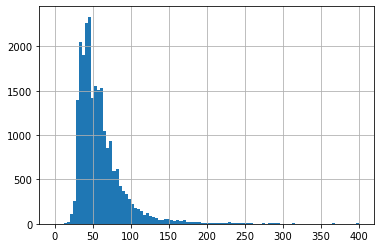

In [32]:
data['total_area'].hist(bins=100, range = (0, 400))

Распределение площади является нормальным

In [33]:
data['first_day_exposition'].value_counts()

2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-05-17      1
2017-01-06      1
2016-12-30      1
2016-07-06      1
2015-03-27      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [34]:
data['rooms'].value_counts()

1     8047
2     7939
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [35]:
data['ceiling_height'].value_counts()

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [36]:
data['ceiling_height'].describe()

count    14503.000000
mean         2.771500
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [37]:
ceiling_height_min = data.sort_values(by='ceiling_height')
print(ceiling_height_min.head(15))

       total_images  last_price  total_area first_day_exposition  rooms  \
22590            16     6000000       55.00           2018-10-31      2   
5712              5     1500000       42.80           2017-08-14      2   
16934             5     4100000       40.00           2017-10-17      1   
11352             4     3300000       36.00           2017-06-18      1   
19329             5     1700000       40.00           2018-07-15      2   
22960            17     2300000       53.60           2018-10-18      2   
20520             9     3600000       38.00           2018-07-05      1   
4212              1     2120000       35.43           2017-12-18      1   
19098             7     2700000       56.00           2018-02-04      3   
5850              9     1650000       35.50           2018-05-29      1   
16446             6    12300000       88.30           2019-03-12      3   
552              11     2999000       33.50           2017-03-30      1   
2572              4     2

In [38]:
ceiling_height_max = data.sort_values(by='ceiling_height', ascending=False)
print(ceiling_height_max.head(30))

       total_images  last_price  total_area first_day_exposition  rooms  \
22869             0    15000000        25.0           2018-07-25      1   
22336            19     9999000        92.4           2019-04-05      2   
3148             14     2900000        75.0           2018-11-12      3   
21377            19     4900000        42.0           2017-04-18      1   
22938            14     4000000        98.0           2018-03-15      4   
4876              7     3000000        25.0           2017-09-27      0   
5246              0     2500000        54.0           2017-10-13      2   
21824            20     2450000        44.0           2019-02-12      2   
17857             1     3900000        56.0           2017-12-22      3   
10773             8     3800000        58.0           2017-10-13      2   
5807             17     8150000        80.0           2019-01-09      2   
20478            11     8000000        45.0           2017-07-18      1   
5669              4     4

In [39]:
ceiling_height_mean = (data['ceiling_height'].mean())
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_mean)

In [40]:
data = data[data.ceiling_height > 1.9] 
data = data[data.ceiling_height < 100]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23694 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23694 non-null  int64         
 1   last_price            23694 non-null  int64         
 2   total_area            23694 non-null  float64       
 3   first_day_exposition  23694 non-null  datetime64[ns]
 4   rooms                 23694 non-null  int64         
 5   ceiling_height        23694 non-null  float64       
 6   floors_total          23608 non-null  float64       
 7   living_area           23694 non-null  float64       
 8   floor                 23694 non-null  int64         
 9   is_apartment          23694 non-null  bool          
 10  studio                23694 non-null  bool          
 11  open_plan             23694 non-null  bool          
 12  kitchen_area          21416 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так. Леш, смотри: когда ты делаешь срез данных, то автоматически удаляются строки с пропуском в этом столбце (тут будет грамотнее сначала произвести замену пропусков, а потом уже делать срез)
</div>

<div class="alert alert-info"> Выполнил</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Всё верно)
</div>

Заполним пропуски в высоте потолков средними значениями, убрав наиболее выбивающиеся значения

In [42]:
data['floors_total'].value_counts()

5.0     5787
9.0     3761
16.0    1376
12.0    1361
4.0     1200
10.0    1174
25.0    1074
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      382
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64

In [43]:
data['living_area'].value_counts()

18.00    896
17.60    755
30.50    710
17.00    675
30.00    598
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1783, dtype: int64

In [44]:
data['floor'].value_counts()

2     3368
3     3073
1     2916
4     2804
5     2619
6     1305
7     1217
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      45
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

In [45]:
data['is_apartment'].value_counts()

False    23645
True        49
Name: is_apartment, dtype: int64

In [46]:
data['studio'].value_counts()

False    23545
True       149
Name: studio, dtype: int64

In [47]:
data['open_plan'].value_counts()

False    23627
True        67
Name: open_plan, dtype: int64

In [48]:
data['kitchen_area'].value_counts()

6.00     1300
10.00    1261
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 969, dtype: int64

In [49]:
kitchen_area_min = data.sort_values(by='kitchen_area')
print(kitchen_area_min.head(15))

       total_images  last_price  total_area first_day_exposition  rooms  \
20217             7     4250000       28.50           2019-05-01      1   
11033             6     5350000       32.00           2016-04-20      1   
6262              9     3100000       24.00           2018-06-25      2   
906              15     2600000       27.00           2017-07-10      1   
16367             2     2720000       25.70           2017-10-30      1   
21419             4     1870000       20.00           2018-03-06      1   
9138             17     2920000       23.29           2018-12-12      1   
19642             5     1190000       14.00           2018-07-29      1   
17834             5     2940000       34.70           2017-10-09      1   
8729              9     2200000       18.40           2018-08-20      1   
7950              3     5967734       66.40           2017-02-07      2   
13814            14     3650000       28.00           2017-08-24      1   
2165             15     3

In [50]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [51]:
kitchen_area_min = data.sort_values(by='kitchen_area', ascending=False)
print(kitchen_area_min.head(15))

       total_images  last_price  total_area first_day_exposition  rooms  \
19540             8   420000000       900.0           2017-12-06     12   
20215             2    85000000       249.7           2018-02-01      3   
2489              9    12500000       255.0           2017-04-21      3   
5358             20    65000000       590.0           2019-02-14     15   
16239             5    82400000       181.1           2017-05-24      3   
16797             9    65850000       146.0           2017-07-14      2   
10867             1    56844500       177.9           2015-01-15      3   
4394             20    57000000       174.0           2015-11-09      3   
492              18    95000000       216.0           2017-12-05      4   
14644            17    47000000       150.0           2017-02-28      4   
16647            15   122000000       145.0           2017-04-25      3   
6193             19    24300000       230.0           2016-06-03      4   
15651            20   300

In [52]:
mean_kit = data['kitchen_area'].mean()

In [53]:
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = mean_kit
data.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


согласно СНиПу кухни не могут быть меньше 5 метров, пропуски в значениях  в значениях означают что кухня как отдельная комната в квартире отсутствует

In [54]:
data['balcony'].value_counts()

0.0    15273
1.0     4195
2.0     3659
5.0      303
4.0      183
3.0       81
Name: balcony, dtype: int64

In [55]:
data['locality_name'].value_counts()

санкт-петербург           15717
поселок мурино              556
поселок шушары              440
всеволожск                  398
пушкин                      369
                          ...  
поселок тесово-4              1
деревня котлы                 1
деревня борисова грива        1
поселок жилпоселок            1
деревня снегиревка            1
Name: locality_name, Length: 330, dtype: int64

In [56]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
44870.0    30
39946.0    30
37407.0    27
           ..
20335.0     1
33699.0     1
26945.0     1
35904.0     1
20875.0     1
Name: airports_nearest, Length: 8274, dtype: int64

In [57]:
data['airports_nearest'].describe()

count    18153.000000
mean     28793.231807
std      12631.802049
min          0.000000
25%      18582.000000
50%      26726.000000
75%      37275.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [58]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None

In [59]:
data['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    26
           ..
5278.0      1
11575.0     1
3205.0      1
12747.0     1
4234.0      1
Name: cityCenters_nearest, Length: 7641, dtype: int64

In [60]:
data['airports_nearest'].describe()

count    18152.000000
mean     28794.818037
std      12630.341886
min       6450.000000
25%      18584.250000
50%      26726.000000
75%      37275.500000
max      84869.000000
Name: airports_nearest, dtype: float64

убрали нулевое значение, так как это скорее всего ошибка

In [61]:
data['parks_around3000'].value_counts()

0.0    10105
1.0     5679
2.0     1746
3.0      647
Name: parks_around3000, dtype: int64

In [62]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

In [63]:
data['parks_nearest'].value_counts()

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64

In [64]:
data['parks_nearest'].describe()

count    8076.000000
mean      490.823304
std       342.343675
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [65]:
data['ponds_around3000'].value_counts()

0.0    9070
1.0    5717
2.0    1891
3.0    1499
Name: ponds_around3000, dtype: int64

In [66]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

сделаем замену аналогично паркам

In [67]:
data['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
474.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

In [68]:
data['ponds_nearest'].describe()

count    9107.000000
mean      518.107719
std       277.670984
min        13.000000
25%       294.000000
50%       502.000000
75%       729.500000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [69]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

Отсутствие значений в данных о времени продажи может свидетельствовать о том, что объявления еще актуальны и не сняты с публикации

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Не все столбцы имеют корректный тип данных. Например `balcony` имеет дробный тип. Но ведь не может быть 1.5 балкона в доме. Как думаешь?
</div>

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23608 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23608 non-null  int64         
 1   last_price              23608 non-null  int64         
 2   total_area              23608 non-null  float64       
 3   first_day_exposition    23608 non-null  datetime64[ns]
 4   rooms                   23608 non-null  int64         
 5   ceiling_height          23608 non-null  float64       
 6   floors_total            23608 non-null  int64         
 7   living_area             23608 non-null  float64       
 8   floor                   23608 non-null  int64         
 9   is_apartment            23608 non-null  bool          
 10  studio                  23608 non-null  bool          
 11  open_plan               23608 non-null  bool          
 12  kitchen_area            23608 non-null  float6

In [71]:

data['balcony'] = data['balcony'].astype('int')

In [72]:
data['floors_total'].isna().sum()

86

In [73]:
data = data.dropna(subset=['floors_total']) 

In [74]:
data['floors_total'] = data['floors_total'].astype('int')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отлично, столбцы имеют корректный тип данных
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует проверка на явные дубликаты, поправишь, пожалуйста?

<div class="alert alert-info"> Выполнил</div>

Вывод:
    В исходных данных было выявленно много ошибок, о чем следует сообщить сотрудникам которые занимаются сбором и выгрузкой данных

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [75]:
data['price_square_meter'] = data['last_price']/data['total_area']
data['price_square_meter'] = data['price_square_meter'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.7000,16,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000,40.4,2018-12-04,1,2.7715,11,18.6,1,False,...,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,10,5196000,56.0,2015-08-20,2,2.7715,5,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000,159.0,2015-07-24,3,2.7715,14,45.0,9,False,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000,100.0,2018-06-19,2,3.0300,14,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


In [76]:
data['price_square_meter'].mean()

99382.21882412741

Была расчитана цена квадратного метра, средняя цена которого составила примерно 99 т.р.

In [77]:
data['day_week'] =  data['first_day_exposition'].dt.weekday

In [78]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week
0,20,13000000,108.0,2019-03-07,3,2.7000,16,51.0,8,False,...,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3
1,7,3350000,40.4,2018-12-04,1,2.7715,11,18.6,1,False,...,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1
2,10,5196000,56.0,2015-08-20,2,2.7715,5,34.3,4,False,...,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3
3,0,64900000,159.0,2015-07-24,3,2.7715,14,45.0,9,False,...,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4
4,2,10000000,100.0,2018-06-19,2,3.0300,14,32.0,13,False,...,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1


был добавлен в таблицу день публикации объявления, а также месяц и год

In [79]:
data['month'] =  data['first_day_exposition'].dt.month
data['years'] =  data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week,month,years
0,20,13000000,108.0,2019-03-07,3,2.7000,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.7715,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.7715,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.7715,14,45.0,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.0300,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://pythobyte.com/how-to-work-with-dates-and-times-in-python-0a176355/
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

In [80]:
last_floor = data.query('floors_total/floor == 1')
data['floor_type'] = data['floor']
data.loc[data['floor_type'] == 1, 'floor_type'] = 'Первый'
data.loc[last_floor.index, 'floor_type'] = 'Последний'
data.loc[(data['floor_type'] != 'Первый') & (data['floor_type']!='Последний'), 'floor_type'] = 'Другой'
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week,month,years,floor_type
0,20,13000000,108.0,2019-03-07,3,2.7000,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370,3,3,2019,Другой
1,7,3350000,40.4,2018-12-04,1,2.7715,11,18.6,1,False,...,0,NaN,0,NaN,81.0,82920,1,12,2018,Первый
2,10,5196000,56.0,2015-08-20,2,2.7715,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785,3,8,2015,Другой
3,0,64900000,159.0,2015-07-24,3,2.7715,14,45.0,9,False,...,2,84.0,3,234.0,424.0,408176,4,7,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.0300,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000,1,6,2018,Другой


In [81]:
data['floor_type'].value_counts()

Другой       17361
Последний     3359
Первый        2888
Name: floor_type, dtype: int64

Самыми популярными объявлениями являются объявления о продаже квартир не на 1 и последнем этаже

In [82]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week,month,years,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7000,16,51.0,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,Другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.7715,11,18.6,1,False,...,NaN,0,NaN,81.0,82920,1,12,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.7715,5,34.3,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,Другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.7715,14,45.0,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,Другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.0300,14,32.0,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,Другой,8.0


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует округление км
</div>

<div class="alert alert-info"> Выполнил</div>

**Вывод:**

Были добавлены столбы, необхлдимые для дальнейших расчетов

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

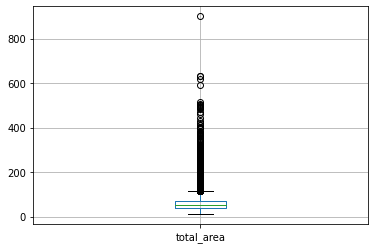

In [83]:
import matplotlib.pyplot as plt
data.boxplot(column=['total_area'])
plt.show()


In [84]:
data['total_area'].describe()

count    23608.000000
mean        60.341945
std         35.650169
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Уберем выбивающиеся значения согласно диограмме размаха, площадь больше 100 м^2 не нужна.

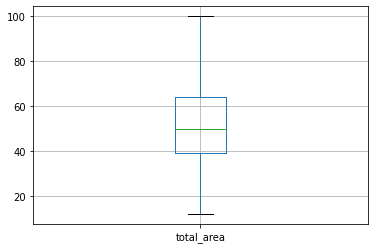

In [85]:
good_data = data.query('total_area < 100')
good_data.boxplot(column=['total_area'])
plt.show()

<AxesSubplot:>

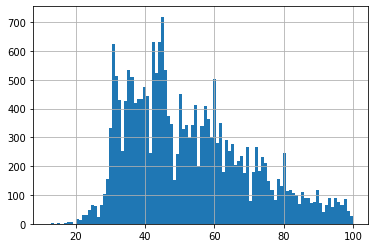

In [86]:
good_data['total_area'].hist(bins=100)

Распределение значений по площади квартир по данной выборке можно считать нормаьным с незначительными отклонениями.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Грамотный шаг рассматривать распределение без boxplot
</div>

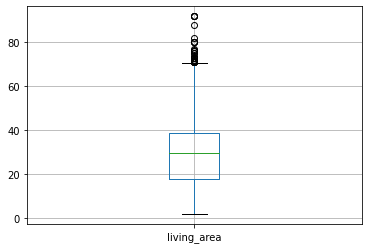

In [87]:
good_data.boxplot(column=['living_area'])
plt.show()

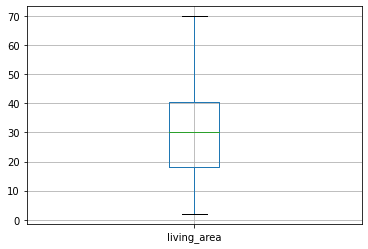

In [88]:
good_data = data.query('living_area < 70')
good_data.boxplot(column=['living_area'])
plt.show()

<AxesSubplot:>

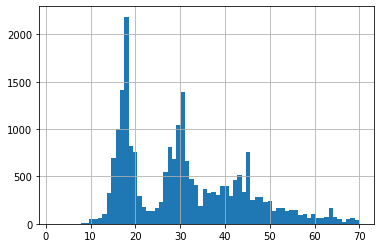

In [89]:
good_data['living_area'].hist(bins=70)

Распределение значений по площади квартир по данной выборке не является нормальным, но это связанно с тем, что мы заполнили пропуски в данных согласно количеством комнат в квартирах, поэтому избавиться от этих пиков не является возможным

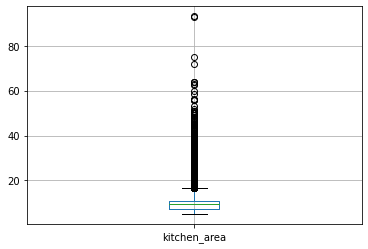

In [90]:
good_data.boxplot(column=['kitchen_area'])
plt.show()

In [91]:
good_data['kitchen_area'].describe()

count    22506.000000
mean        10.078331
std          4.747963
min          5.000000
25%          7.200000
50%          9.552663
75%         11.000000
max         93.200000
Name: kitchen_area, dtype: float64

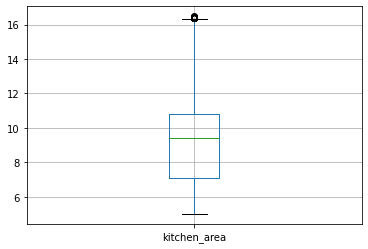

In [92]:
good_data = data.query('kitchen_area < 16.5')
good_data.boxplot(column=['kitchen_area'])
plt.show()

<AxesSubplot:>

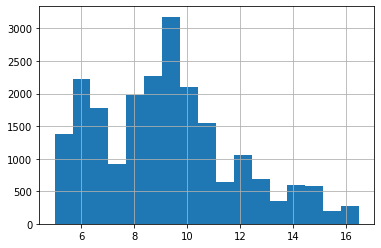

In [93]:
good_data['kitchen_area'].hist(bins=17)

Распределение значений по площади кухни по данной выборке можно считать нормаьным с незначительными отклонениями.

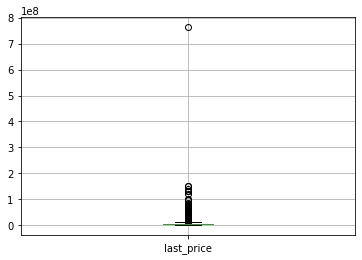

In [94]:
good_data.boxplot(column=['last_price'])
plt.show()

In [95]:
data['last_price'].describe()

count    2.360800e+04
mean     6.540813e+06
std      1.090259e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

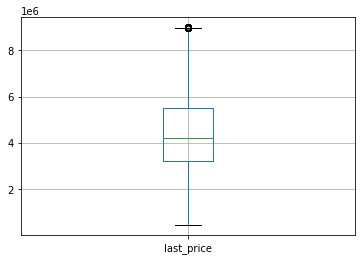

In [96]:
good_data = good_data.query('last_price < 9000000')
good_data.boxplot(column=['last_price'])
plt.show()

<AxesSubplot:>

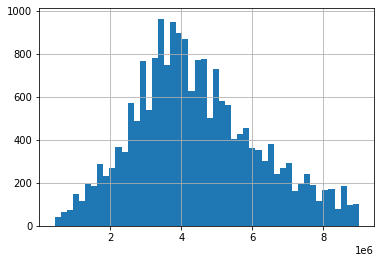

In [97]:
good_data['last_price'].hist(bins=50)

Отсеяли квартиры выше 9 млн. и по графику видно что пик объявлений находится на уровне 4 млн.

<AxesSubplot:>

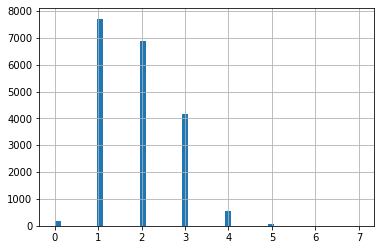

In [98]:
good_data['rooms'].hist(bins=50)

Больше всего продается 1, 2х и 3х комнатных квартир

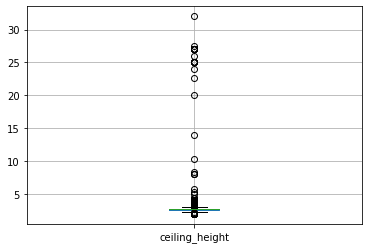

In [99]:
good_data.boxplot(column=['ceiling_height'])
plt.show()

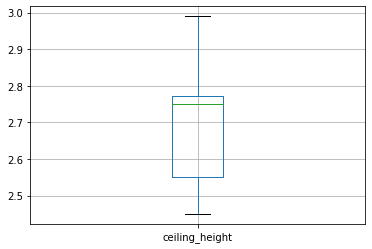

In [100]:
good_data = good_data.query('ceiling_height < 3.0 and ceiling_height > 2.4')
good_data.boxplot(column=['ceiling_height'])
plt.show()

Отфильтровали предложения согласно диограмме размаха, для корректности дальнейших расчетов

<AxesSubplot:>

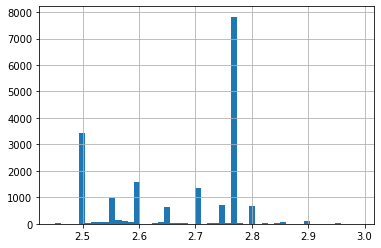

In [101]:
good_data['ceiling_height'].hist(bins=50)

<AxesSubplot:>

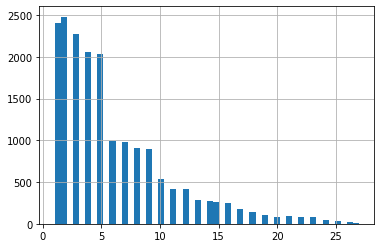

In [102]:
good_data['floor'].hist(bins=50)

Большинство квартир продается на первых этажах, что может быть связанно с типом домов в регионе

<AxesSubplot:>

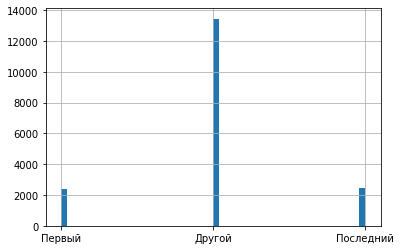

In [103]:
good_data['floor_type'].hist(bins=50)

Наибольшее число объявлений встречается с квартирами находящиеся не на первом и последнем этажах

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полученные данные соответствуют реалиям
</div>

<AxesSubplot:>

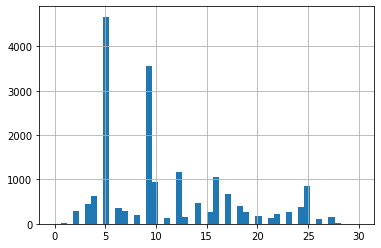

In [104]:
good_data['floors_total'].hist(bins=50, range=(0, 30))

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Я бы советовал сократить range и тогда мы сможем увидеть пиковые значения. 
</div>

Как и предполагалось большинство домов это 5 и 9 этажные дома

<AxesSubplot:>

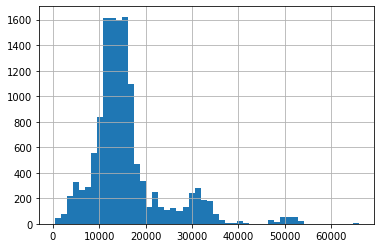

In [105]:
good_data['cityCenters_nearest'].hist(bins=50)

большенство объявлений находится в 15км от центра города

<AxesSubplot:>

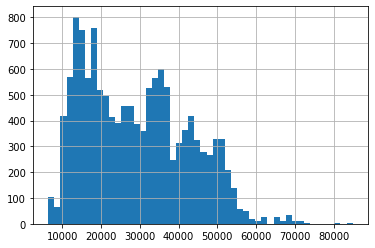

In [106]:
good_data['airports_nearest'].hist(bins=50)

пик объявлений приходится на квартиры в 15км от которых находится аэропорт 

<AxesSubplot:>

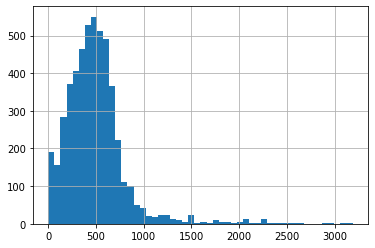

In [107]:
good_data['parks_nearest'].hist(bins=50)

пик объявлений приходится на квартиры в 500 метрах от которых находится парк

<AxesSubplot:>

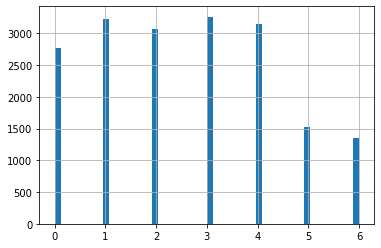

In [108]:
good_data['day_week'].hist(bins=50)

в выходные заметен спад в публикуемых объявлениях

<AxesSubplot:>

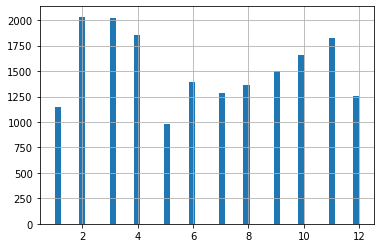

In [109]:
good_data['month'].hist(bins=50)

Весной наблюдается увелечение объявлений о прадажах квартир

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае не до продаж, все на огородах =)
</div>

**Изучим, как быстро продавались квартиры**

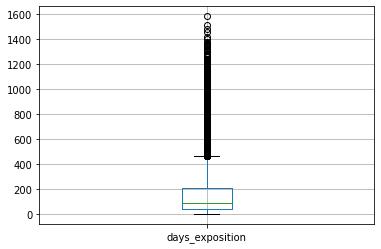

In [110]:
good_data.boxplot(column=['days_exposition'])
plt.show()

In [111]:
good_data['days_exposition'].describe()

count    16249.000000
mean       165.656779
std        202.911396
min          1.000000
25%         42.000000
50%         88.000000
75%        210.000000
max       1580.000000
Name: days_exposition, dtype: float64

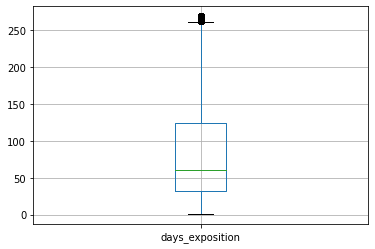

In [112]:
good_data = good_data.query('days_exposition < 270')
good_data.boxplot(column=['days_exposition'])
plt.show()

In [113]:
good_data['days_exposition'].agg(['mean','median'])

mean      84.128702
median    61.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

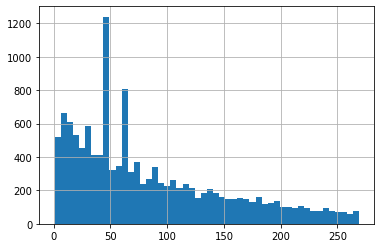

In [114]:
good_data['days_exposition'].hist(bins=50)

In [115]:
good_data['days_exposition'].describe()

count    13100.000000
mean        84.128702
std         66.878055
min          1.000000
25%         32.000000
50%         61.000000
75%        124.000000
max        269.000000
Name: days_exposition, dtype: float64

Таким образом, в среднем квартиры продаются за 3 месяца, больше 4 месяцев можно считать долгой продажей, а меньше 1 быстрой

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Медиана и среднее указывать лишь на то, в какую сторону скошены данные. Я бы рекомендовал отвечать на вопрос - опираясь на данные боксплота или describe()
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Я бы рекомендовал опираться на 25% и 75% распределение. Т.е. до месяца считать быстрой продажей, а свеше 124 дней - долгой
</div>

**определим какие факторы больше всего влияют на общую (полную) стоимость объекта**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

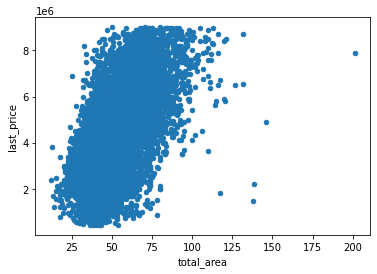

In [116]:
good_data.plot(x='total_area', y='last_price', kind='scatter') 

In [117]:
print(data['total_area'].corr(data['last_price']))

0.653697395227246


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что зависимость переменных рассматриваешь через тип графика scatter
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Давай графики зависимостей подкрепим корреляцией Пирсона и сразу интерпретируем полученные результаты?
</div>

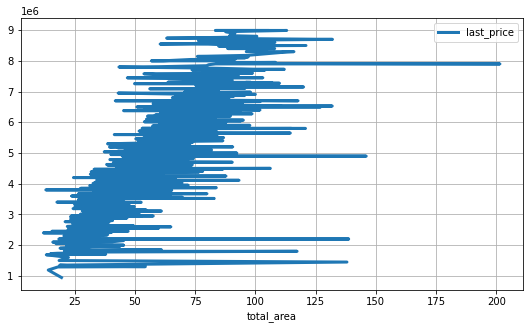

In [118]:
(good_data
     .pivot_table(index='total_area', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3)
)

plt.show()

Чем выше площадь квартиры, тем выше цена на нее. Наблюдается заметная связь между общей площадью и ценой.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

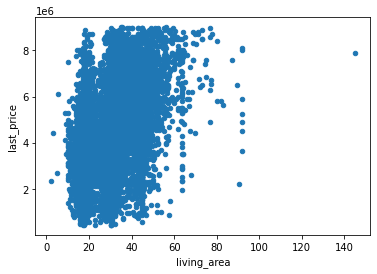

In [119]:
good_data.plot(x='living_area', y='last_price', kind='scatter') 

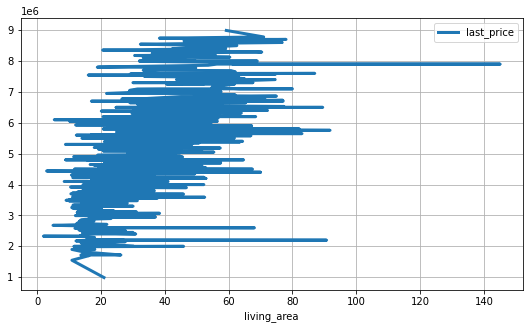

In [120]:
(good_data
     .pivot_table(index='living_area', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3)
)

plt.show()

In [121]:
print(data['living_area'].corr(data['last_price']))

0.5560478478796548


Чем выше жилая площадь квартиры, тем выше цена на нее. Наблюдается заметная связь между жилой площадью и ценой.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

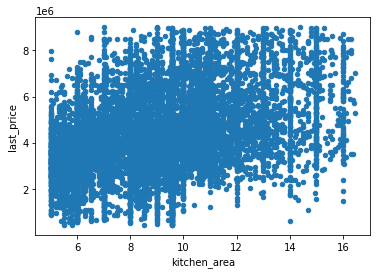

In [122]:
good_data.plot(x='kitchen_area', y='last_price', kind='scatter') 

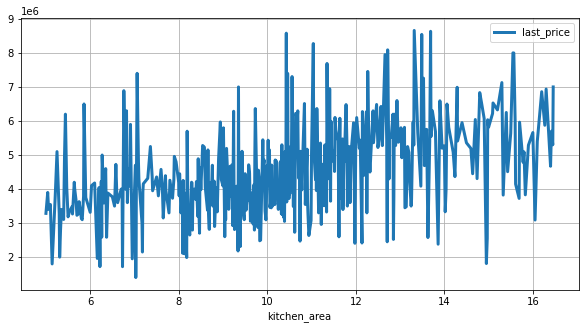

In [123]:
(good_data
    
     .pivot_table(index='kitchen_area', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3)
     
)
plt.show()

In [124]:
print(data['kitchen_area'].corr(data['last_price']))

0.44146715760735983


прямая связь цены квартиры и площади квартиры прослеживается, хоть и не так явно. Наблюдается умеренная связь между площадью кухни и ценой.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

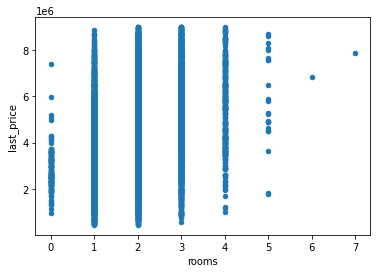

In [125]:
good_data.plot(x='rooms', y='last_price', kind='scatter') 

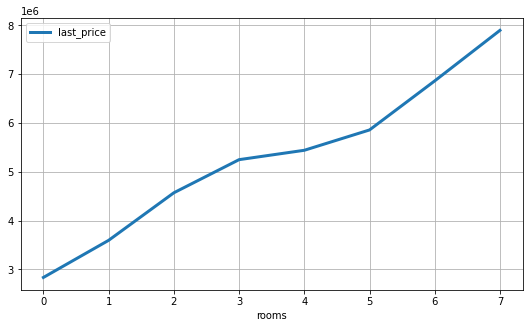

In [126]:
(good_data
     .pivot_table(index='rooms', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3)
)

plt.show()

In [127]:
print(data['rooms'].corr(data['last_price']))

0.3631690002210671


Заметна связь цены квартиры от количества комнат, однако связь является умеренной.

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

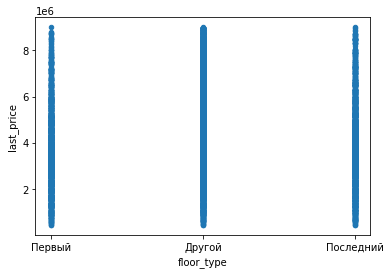

In [128]:
good_data.plot(x='floor_type', y='last_price', kind='scatter') 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

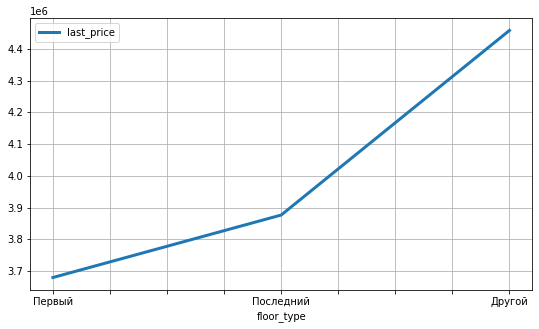

In [129]:
(good_data
     .pivot_table(index='floor_type', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3)
)

plt.show()

Цены на первый и последний этаж значительно ниже 

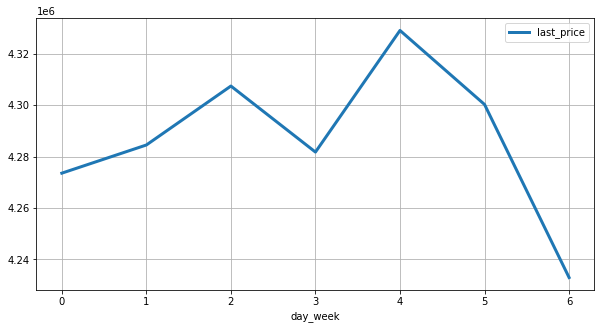

In [130]:
(good_data
    
     .pivot_table(index='day_week', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3)
)
plt.show()

In [131]:
print(data['day_week'].corr(data['last_price']))

0.0012601252541723758


максимальные цены приходятся на субботу, а минимальные на воскресенье, однако связь слабая

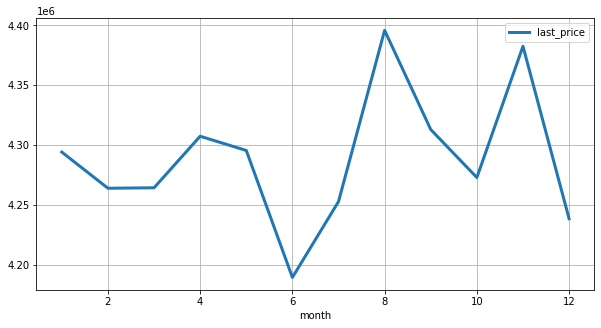

In [132]:
(good_data
    
     .pivot_table(index='month', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3)
)
plt.show()

In [133]:
print(data['month'].corr(data['last_price']))

0.0027560732064641005


самые дорогие объявления выставляются в августе, однако связь слабая

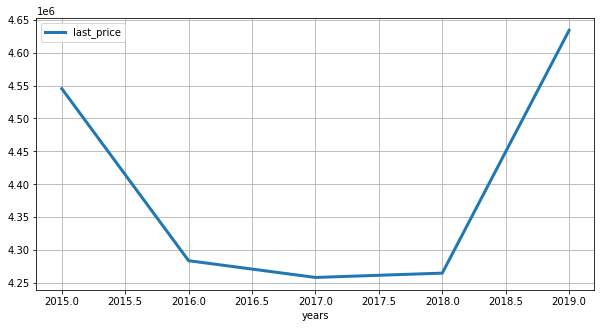

In [134]:
(good_data
    
     .pivot_table(index='years', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3)
     
)
plt.show()

In [135]:
print(data['years'].corr(data['last_price']))

-0.04301655960009206


заметен спад в ценах после 15 года и рост после 18, однако связь слабая и отрицательная

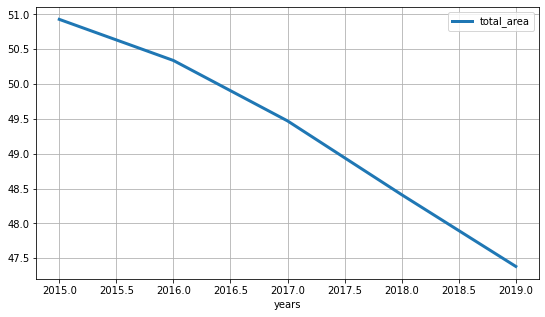

In [136]:
(good_data
     .pivot_table(index='years', values='total_area').sort_values(by='total_area', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3)
)

plt.show()

Судя по графику, причиной снижения стоимости квартир стало снижение средней площади покупаемых квартир

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Давай рассмотрим динамику цены и площади продаваемых квартир. И потом пересмотрим выводы, т.к., возможно, упала не столько цена, сколько площадь продаваемых квартир?
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличный инсайд для заказчика
</div>

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [137]:
data_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_10.columns=['number']
print(data_10)

                   number
locality_name            
санкт-петербург     15647
поселок мурино        552
поселок шушары        439
всеволожск            398
пушкин                369
колпино               338
поселок парголово     327
гатчина               307
деревня кудрово       299
выборг                237


In [138]:
data_10['price'] = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean')
print(data_10)

                   number          price
locality_name                           
санкт-петербург     15647  114845.923052
поселок мурино        552   85629.110507
поселок шушары        439   78550.883827
всеволожск            398   68654.007538
пушкин                369  103125.373984
колпино               338   75424.150888
поселок парголово     327   90175.489297
гатчина               307   68745.693811
деревня кудрово       299   92473.086957
выборг                237   58141.489451


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

Самый дорогой метр квадратный приходится на СПб и Пушкин, а дешевый на Гатчину и Всеволожск

**вычислим среднюю цену каждого километра в СПБ**

In [139]:
spb = data.loc[data['locality_name'] == 'санкт-петербург']

In [140]:
spb['cityCenters_nearest'].isna().sum()

60

In [141]:
spb=spb.dropna(subset=['cityCenters_nearest'])
print(spb)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000      108.00           2019-03-07      3   
2                10     5196000       56.00           2015-08-20      2   
3                 0    64900000      159.00           2015-07-24      3   
4                 2    10000000      100.00           2018-06-19      2   
7                 5     7915000       71.60           2019-04-18      2   
...             ...         ...         ...                  ...    ...   
23689            13     3550000       35.30           2018-02-28      1   
23690             3     5500000       52.00           2018-07-19      2   
23691            11     9470000       72.90           2016-10-13      2   
23694             9     9700000      133.81           2017-03-21      3   
23697            13    11475000       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0              2.7000

In [142]:
spb['cityCenters_nearest_km'].describe()

count    15587.000000
mean        11.583114
std          4.854056
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: cityCenters_nearest_km, dtype: float64

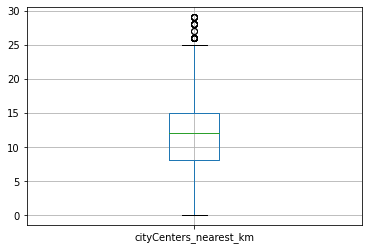

In [143]:
spb.boxplot('cityCenters_nearest_km')

plt.show()

отсечем мешающие статисткие и анализу данные

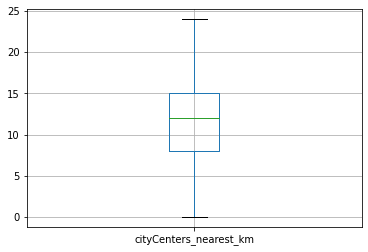

In [144]:
spb = spb.loc[spb['cityCenters_nearest_km'] < 25]
spb.boxplot('cityCenters_nearest_km')

plt.show()

In [145]:
mean_price_km = spb['last_price'].sum()/spb['cityCenters_nearest_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(mean_price_km))

Средняя цена для каждого километра составляет 700242 ₽


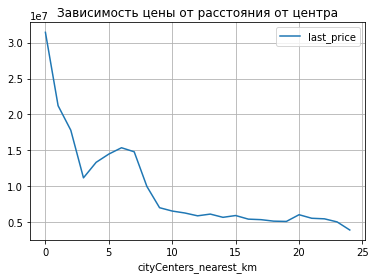

In [146]:
spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')\
    .plot(grid = True, title = 'Зависимость цены от расстояния от центра')
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация. В твой код добавил заголовок и сетку, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

In [147]:
final=spb[['cityCenters_nearest_km', 'years', 'floor_type', 'total_area','last_price','rooms','ceiling_height']].reset_index(drop=True)

In [148]:
final.corr()

,cityCenters_nearest_km,years,total_area,last_price,rooms,ceiling_height
cityCenters_nearest_km,1.000000,0.085942,-0.339563,-0.260915,-0.292657,-0.157761
years,0.085942,1.000000,-0.087607,-0.045200,-0.061872,-0.024178
total_area,-0.339563,-0.087607,1.000000,0.655114,0.758555,0.135196
last_price,-0.260915,-0.045200,0.655114,1.000000,0.370829,0.092713
rooms,-0.292657,-0.061872,0.758555,0.370829,1.000000,0.087217
ceiling_height,-0.157761,-0.024178,0.135196,0.092713,0.087217,1.000000


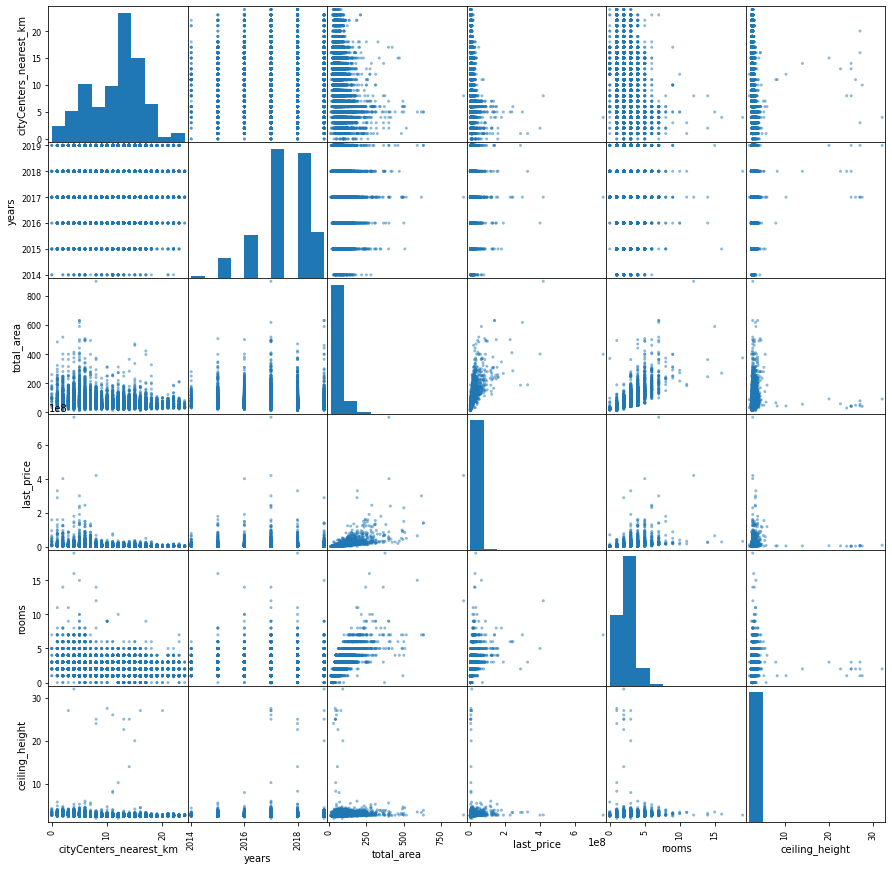

In [149]:
final_1=spb[['cityCenters_nearest_km', 'years', 'floor_type', 'total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(final_1, figsize=(15, 15))
plt.show()

Исходя из графиков заметим, что чем ближе квартира к центру, тем выше ее средняя площадь, также в центре продается больше многокомнатных квартир. Заметена также связь цены от расстояния к центру, на расстоянии до 10км цены в среднем доходят до 20 млн. рублей. Также в центре чаще продаются квартиры больше 200 кв. метров.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Не стоит списывать работу со сторонних источников, стоит свериться с актуальностью заданий
</div>

### Общий вывод

Анализируя данные объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах были сделаны следующие выводы:

1) Было выявленно много пропусков почти во всех столбцах и неправильные типы данных в таблице
2) Были по возможности наполненны пропущенные значения для использования наибольшего данных, где это сделать было невозможно строки были удалены. В целях исключения мусорных данных необходимо сообщить сотрудникам которые занимаются сбором и выгрузкой данных о наличии данной проблемы.
3) Были добавлены дополнительные столбцы, необходимые для дальнейшего аналиа, а также рассчитана средняя стоимость квадратного метра, которая составила 99 т.р.
4) Найдена связь цены на квартиры от:
* Общей площади (чем выше площадь, тем выше стоимость)
* жилой площади (чем выше жилая площадь, тем выше стоимость)
* площади кухни (связь не сильная, но все же прослеживается рост цены от увеличения площади кухни)
* количество комнат (чем больше комнат, тем выше стоимость)
* типа этажа, на котором расположена квартира (на первом и последнем этаже цена ниже)
* даты размещения (максимальные цены приходятся на субботу, а минимальные на воскресенье, самые дорогие объявления выставляются в августе, так же заметим значительный спад в цене после 15 года и рост после 18, однако это связанно в основном с изменением площади продажи квартиры в меньшую сторону)

Для большей наглядности при анализе использовались графики, из которых легко можно сделать вывод о том, что лидером по размещению объявлений о продаже недвижимости является "Санкт-Петербург", несмотря на это средняя цена квадратного метра не сильно выше, чем в целом по области. Тенденция рынка такова, что начиная с 2018 года активно растёт спрос на жильё. В основной своей массе стараются найти предложения квартир на любом этаже за исключением первого и последнего.

Так как застройки в центре в основном не ведется, спрос на жилье на окраине СПб и дальше будет расти. В большинстве случаев покупки жилья люди выбирают 1-2 комнатные квартиры с средней стоимостью в 100 т.р. за кв.метр. Таким образом можно сделать вывод о том, что количество таких домов и соответственно предложений будет расти в след за ценой в отличии от цен на жильё расположенного по центру исторического района города в невысоких домах из старого фонда.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно.
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Супер, все четко и лаконично
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Предобработка (удаление данных)

2) Типы данных

3) Проверка на дубликаты

4) Округление

5) Какие продажи можно считать быстрыми, а какие — необычно долгими?

6) Корреляция Пирсона

7) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод